In [1]:
import torch
import numpy as np
import non_local_boxes
import matplotlib.pyplot as plt
import random

# Sugar coating for reloading
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
matrix_to_tensor = non_local_boxes.utils.matrix_to_tensor
tensor_to_matrix = non_local_boxes.utils.tensor_to_matrix

PR = matrix_to_tensor(non_local_boxes.utils.PR)
SR = matrix_to_tensor(non_local_boxes.utils.SR)
I = matrix_to_tensor(non_local_boxes.utils.I)

n = non_local_boxes.evaluate.nb_columns
W_BS09 = non_local_boxes.utils.W_BS09(n)

def WinCHSH(P): return float(non_local_boxes.evaluate.h_flat(P))                    # P is a 2x2x2x2 tensor
def WinCHSHprime(P): return float(non_local_boxes.evaluate.h_prime_flat(P))         # P is a 2x2x2x2 tensor
def BoxProduct(W,P,Q): return non_local_boxes.evaluate.R_tensor(W,P,Q)[:,:,:,:,0]   # P,Q are is a 2x2x2x2 tensor

In [3]:
p = random.random()
q = random.random()
if p+q>1:
    a = -(p+q-1)/2
    p += a
    q += a

print(p,q)
print(p+q)
P = p*PR + q*SR + (1-p-q)*I
print(WinCHSHprime(P), WinCHSH(P))
print(p/2 + (3/4)*q + (1-p-q)/2, p+(3/4)*q+(1-p-q)/2)

0.33474429368449343 0.6652557063155066
1.0
0.666313886642456 0.8336860537528992
0.6663139265788767 0.8336860734211233


In [4]:
def generate_p_q():
    p = random.random()
    q = random.random()
    if p+q>1:
        a = -(p+q-1)/2
        p += a
        q += a
    return p,q

In [5]:
def expression_A_B(P):
    p1, p2 = WinCHSHprime(P), WinCHSH(P)
    print("P=(",p1,p2,")")
    a1 = (1 + 10*p1**3 + 3*p2 - 4*p2**2 + (p1**2)*(-13+21*p2) + 2*p1*(3-8*p2+6*p2**2))*(1/4)
    a2 = (-1 + 6*p1**3 + 9*p2 - 20*p2**2 + 16*p2**3 + (p1**2)*(-11+27*p2) + p1*(6-32*p2+36*p2**2))/4
    b1 = (1 + 4*p1**3 + 2*p2 - 3*p2**2 + (4*p1**2)*(-1+3*p2) + p1*(3-8*p2+9*p2**2))/4
    b2 = (-1 + 12*p1**3 + 10*p2 - 21*p2**2 + 16*p2**3 + (4*p1**2)*(-5+9*p2) + p1*(9-40*p2+39*p2**2))/4
    return [a1, a2, b1, b2]

In [6]:
nb_iter = 1

for _ in range(nb_iter):
    p,q = generate_p_q()
    P = p*PR + q*SR + (1-p-q)*I
    A = BoxProduct(W_BS09, P, BoxProduct(W_BS09, P, P))
    B = BoxProduct(W_BS09, BoxProduct(W_BS09, P, P), P)
    L = expression_A_B(P)
    # print(abs(WinCHSHprime(A) - L[0]))
    # if abs(WinCHSHprime(A) - L[0])<1e-5:
    #     print(True)
    print(L)
    print(WinCHSHprime(A), WinCHSH(A))
    print(WinCHSHprime(B), WinCHSH(B))

P=( 0.6824483871459961 0.8175516128540039 )
[1.6350911771968082, 2.864908822803192, 1.5741593256945756, 2.9258406743054244]
0.6488045454025269 0.8511954545974731
0.6364798545837402 0.8635201454162598


CALCULER À LA MAIN !!

# $P \boxtimes (P\boxtimes P)$

In [7]:
def coeff_PR(p,q):
    return p*(1+2*p + 13*p**2 + 6*q + 30*p*q + 21*q**2)/16

def coeff_SR(p,q):
    return (-p-2*p**2 + 3*p**3 -6*p*q + 18*p**2*q + 27*p*q**2 + 16*q**3)/16

def coeff_I(p,q):
    return (1-p-q)*(1+p+q+2*p*q + p**2 + q**2)

1.0
[[[[2.9802322387695312e-08, 2.9802322387695312e-08], [2.9802322387695312e-08, 2.9802322387695312e-08]], [[1.4901161193847656e-08, 1.4901161193847656e-08], [1.4901161193847656e-08, 0.0]]], [[[1.4901161193847656e-08, 1.4901161193847656e-08], [1.4901161193847656e-08, 2.9802322387695312e-08]], [[2.9802322387695312e-08, 2.9802322387695312e-08], [2.9802322387695312e-08, 4.470348358154297e-08]]]]
[2.9802322387695312e-08, 2.9802322387695312e-08, 2.9802322387695312e-08, 2.9802322387695312e-08, 1.4901161193847656e-08, 1.4901161193847656e-08, 1.4901161193847656e-08, 0.0, 1.4901161193847656e-08, 1.4901161193847656e-08, 1.4901161193847656e-08, 2.9802322387695312e-08, 2.9802322387695312e-08, 2.9802322387695312e-08, 2.9802322387695312e-08, 4.470348358154297e-08]


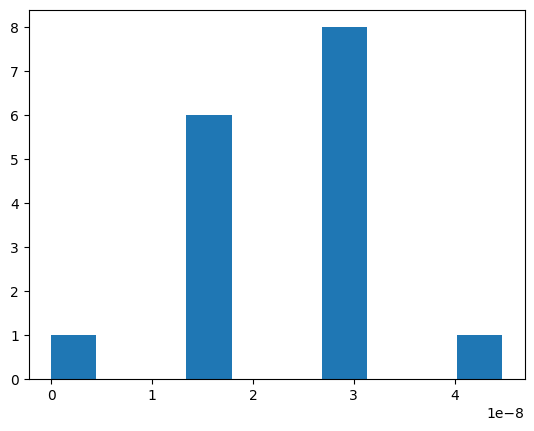

In [126]:
p,q = generate_p_q()
P = p*PR + q*SR + (1-p-q)*I
A = BoxProduct(W_BS09, P, BoxProduct(W_BS09, P, P))
print(coeff_PR(p,q) + coeff_SR(p,q) + coeff_I(p,q))
L = (A - (coeff_PR(p,q)*PR + coeff_SR(p,q)*SR + coeff_I(p,q)*I)).tolist()
print(L)
L = sum(L, [])
L = sum(L, [])
L = sum(L, [])
print(L)

plt.hist(L)
plt.show()

# $(P\boxtimes P)\boxtimes P$

In [8]:
def coeff_PR_2(p,q):
    return p*(2 + p + 5*p**2 + 2*q + 15*p*q + 12*q**2)/8

def coeff_SR_2(p,q):
    return (-2*p - p**2 + 3*p**3 - 2*p*q + 9*p**2*q + 12*p*q**2 + 8*q**3)/8

def coeff_I_2(p,q):
    return (1-p-q)*(1+p+q+2*p*q + p**2 + q**2)

1.0
[[[[0.0, 0.0], [0.0, -1.4901161193847656e-08]], [[0.0, 0.0], [0.0, 0.0]]], [[[0.0, 0.0], [0.0, 0.0]], [[0.0, 0.0], [0.0, 0.0]]]]
[0.0, 0.0, 0.0, -1.4901161193847656e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


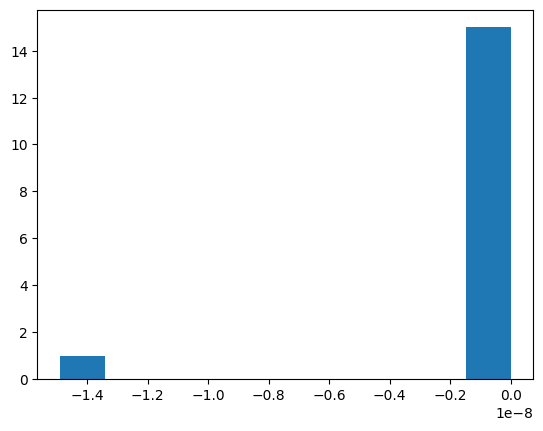

In [9]:
p,q = generate_p_q()
P = p*PR + q*SR + (1-p-q)*I
A = BoxProduct(W_BS09, BoxProduct(W_BS09, P, P), P)
print(coeff_PR_2(p,q) + coeff_SR_2(p,q) + coeff_I_2(p,q))
L = (A - (coeff_PR_2(p,q)*PR + coeff_SR_2(p,q)*SR + coeff_I_2(p,q)*I)).tolist()
print(L)
L = sum(L, [])
L = sum(L, [])
L = sum(L, [])
print(L)

plt.hist(L)
plt.show()